In [1]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
# import seaborn
# plt.style.use('seaborn-white')
from pathlib import Path
import time

import matplotlib.cm as cm
from IPython.display import Image
import git

In [2]:
from rmgpy.molecule import Molecule
from rmgpy.data.base import Database

## Git-python: checkout master branch

In [3]:
import git
rmg_model_path = "/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis"
repo = git.Repo(rmg_model_path)
date = time.localtime(repo.head.commit.committed_date)
git_date = f"{date[0]}_{date[1]}_{date[2]}_{date[3]}{date[4]}"
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")
git_file_string = f"{git_date}_{git_sha}_{git_msg}"
current_commit = git_file_string
current_commit

'2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter'

## checkout 1 commit back

In [4]:
# repo.git.checkout('HEAD^1')
# date = time.localtime(repo.head.commit.committed_date)
# git_date = f"{date[0]}_{date[1]}_{date[2]}_{date[3]}{date[4]}"
# git_sha = str(repo.head.commit)[0:6]
# git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")
# git_file_string = f"{git_date}_{git_sha}_{git_msg}"
# current_commit = git_file_string

## checkout 2 commits back

In [5]:
# repo.git.checkout('HEAD^1')
# date = time.localtime(repo.head.commit.committed_date)
# git_date = f"{date[0]}_{date[1]}_{date[2]}_{date[3]}{date[4]}"
# git_sha = str(repo.head.commit)[0:6]
# git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")
# git_file_string = f"{git_date}_{git_sha}_{git_msg}"
# current_commit = git_file_string

## Read in data

In [7]:
commit_list = []

# read in each filename into dictionary. 
for path in Path('../').rglob('*.csv'):
    path_str = str(path)
    start_index = path_str.find('../RMG_wDeut/')
    
    if start_index != -1:
        commit = path_str[(start_index+13):(start_index+83)]
        if commit not in commit_list:
            commit_list.append(commit)
        
print(commit_list)   
# os.remove("endrxncsv.csv")

['2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter']


In [37]:
# read last line from each CSV file
data_dict = {}

# exclude CSP, steady state, and non - sensitivity data
exclude = ["/csp/", "/steady_state/", "sensitivity_on"]

# if true, runs analysis on current commit only
one_commit = False
if one_commit == True:
    commit_list = [current_commit]
    

commit_list = ['2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter']

for commit in commit_list:
    first_file = True
    for path in Path(commit).rglob('*.csv'):
        path_str = str(path)
        if all(f not in path_str for f in exclude):
            if os.stat(path_str).st_size != 0:
                if first_file == True: 
                    data = pd.read_csv(path_str)
                    aggdata = data.tail(1)
                    first_file = False
                    print(path)                    
                else: 
                    data = pd.read_csv(path_str)
                    aggdata = aggdata.append(data.tail(1))
                    print(len(aggdata))
                    print(path)
            
    data_dict.update({commit:aggdata})}
    


2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_1.csv
2
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_2.csv
3
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_3.csv
4
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_4.csv
5
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_5.csv
6
2021_5_5_1342_199260_fixe

43
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_5_COCO2_0_8.csv
44
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_5_COCO2_0_9.csv
45
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_7_COCO2_0_1.csv
46
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_7_COCO2_0_2.csv
47
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_7_COCO2_0_3.csv
48
2021_5_5_1342_199

85
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_7_COCO2_0_5.csv
86
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_7_COCO2_0_6.csv
87
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_7_COCO2_0_7.csv
88
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_7_COCO2_0_8.csv
89
2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_7_COCO2_0_9.csv
90
2021_5_5_1342_199

In [36]:
data_dict[commit]

,T (C),P (atm),V (M^3/s),X_co initial,X_co2 initial,X_h2 initial,X_h2o initial,CO2/(CO2+CO),(CO+CO2/H2),T (C) final,...,COXX(63) + HCO*(16) <=> CHOX2(64) + CO*(14) ROP [kmol/m^2 s],CHOX2(64) + CO2*(15) <=> COXX(63) + HCOO*(17) ROP [kmol/m^2 s],CHOX2(64) + CO2*(15) <=> COOH*(18) + COXX(63) ROP [kmol/m^2 s],COXX(63) + HCOOH*(19) <=> CHOX2(64) + HCOO*(17) ROP [kmol/m^2 s],COXX(63) + HCOOH*(19) <=> CHOX2(64) + COOH*(18) ROP [kmol/m^2 s],CH2O*(20) + COXX(63) <=> CHOX2(64) + HCO*(16) ROP [kmol/m^2 s],CH2O*(20) + CHOX2(64) <=> CH3O*(21) + COXX(63) ROP [kmol/m^2 s],CHOX2(64) + HCOOH*(19) <=> CH3O2*(22) + COXX(63) ROP [kmol/m^2 s],CH3OH*(23) + COXX(63) <=> CH3O*(21) + CHOX2(64) ROP [kmol/m^2 s],COXX(63) + H2X(51) <=> CHOX2(64) + H*(10) ROP [kmol/m^2 s]
9999,400,7599375.0,0.00424,0.050,0.450,0.50,0.0,0.9,1.000000,400.0,...,-2.709140e-19,2.704449e-21,2.704512e-21,2.067599e-37,2.078971e-37,-1.865238e-32,-1.608773e-24,5.778493e-30,4.369100e-29,1.407151e-28
9999,400,7599375.0,0.00424,0.100,0.400,0.50,0.0,0.8,1.000000,400.0,...,-9.652118e-19,1.991320e-21,1.991376e-21,4.940036e-37,4.949130e-37,-1.001748e-31,-2.355160e-24,1.181870e-29,1.443553e-28,1.888088e-28
9999,400,7599375.0,0.00424,0.150,0.350,0.50,0.0,0.7,1.000000,400.0,...,-3.133379e-18,8.684939e-22,8.685273e-22,8.525316e-37,8.530094e-37,-3.920479e-31,-2.549799e-24,1.789335e-29,3.735107e-28,2.335889e-28
9999,400,7599375.0,0.00424,0.200,0.300,0.50,0.0,0.6,1.000000,400.0,...,-1.686014e-17,1.791810e-22,1.791964e-22,1.239603e-36,1.239772e-36,-2.194456e-30,-2.042687e-24,2.012618e-29,1.069046e-27,2.923268e-28
9999,400,7599375.0,0.00424,0.250,0.250,0.50,0.0,0.5,1.000000,400.0,...,-2.462790e-16,1.909742e-24,1.905597e-24,1.334061e-36,1.334036e-36,-3.075492e-29,7.515817e-25,8.255770e-30,2.774842e-27,3.243839e-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,600,7599375.0,0.00424,0.025,0.025,0.95,0.0,0.5,0.052632,600.0,...,-1.276985e-17,7.394553e-19,7.459855e-19,-4.771860e-31,-3.604298e-31,-4.189319e-25,-9.244724e-21,1.135655e-25,-4.298585e-25,2.381243e-22
9999,600,7599375.0,0.00424,0.030,0.020,0.95,0.0,0.4,0.052632,600.0,...,-1.562937e-17,6.525727e-19,6.583577e-19,-4.453453e-31,-3.419017e-31,-5.790048e-25,-1.036148e-20,1.018756e-25,-6.141129e-25,2.482226e-22
9999,600,7599375.0,0.00424,0.035,0.015,0.95,0.0,0.3,0.052632,600.0,...,-1.879736e-17,5.297896e-19,5.345044e-19,-3.811063e-31,-2.967917e-31,-7.656625e-25,-1.147919e-20,8.397992e-26,-8.305887e-25,2.597494e-22
9999,600,7599375.0,0.00424,0.040,0.010,0.95,0.0,0.2,0.052632,600.0,...,-2.227772e-17,3.769992e-19,3.803674e-19,-2.851058e-31,-2.248671e-31,-9.792625e-25,-1.259795e-20,6.062242e-26,-1.079712e-24,2.722301e-22


## Turn over frequency comparison

The mechanisms listed below are the pathways that are of interest in TOF.



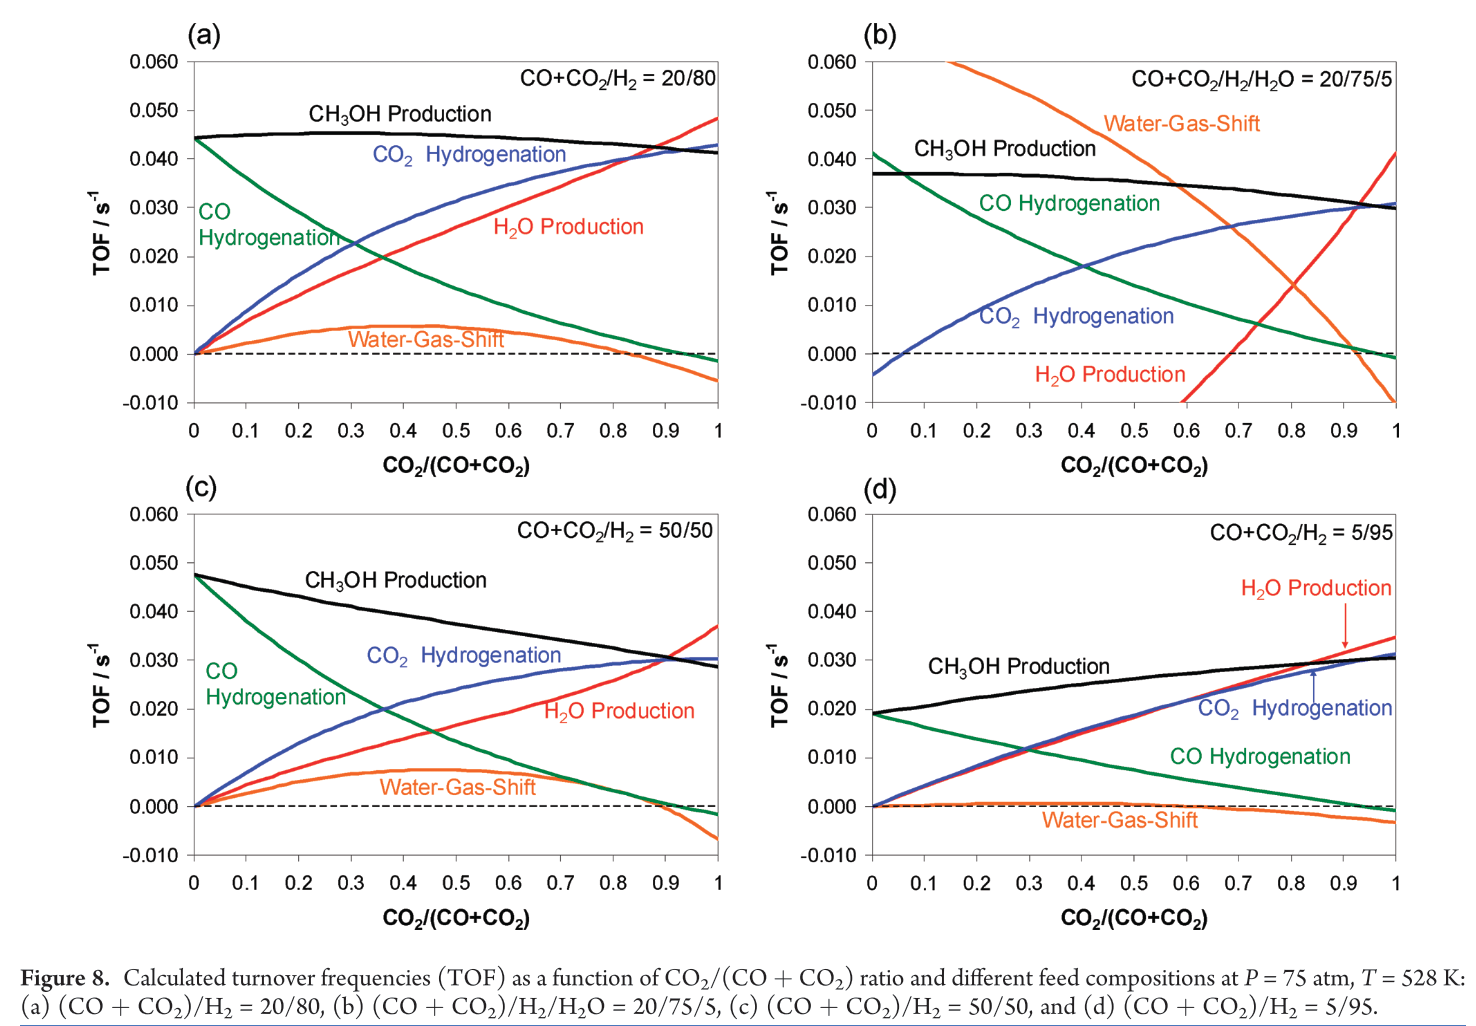

In [8]:
Image('../images/Grabow_plots/Grabow_TOF.png',width = 700, height = 300)

In [9]:
commit_list

['2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter']

{0.5, 0.75, 0.8, 0.95}


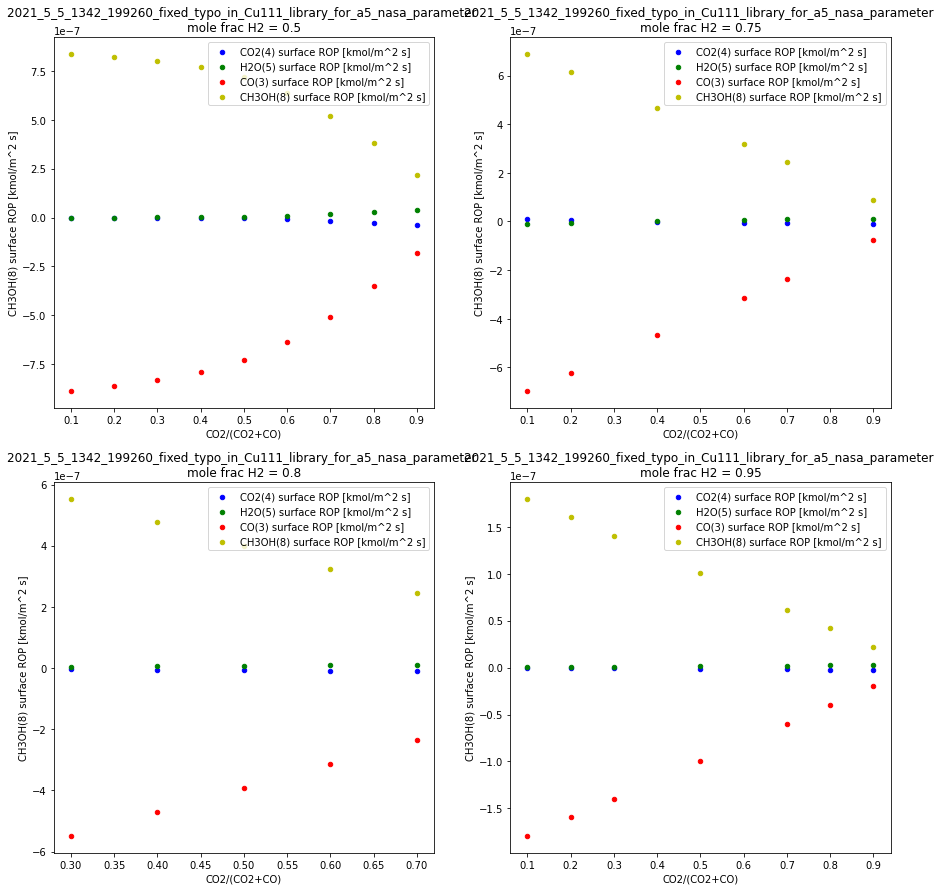

In [24]:
# compare the rate of production for CO2,  H2O, CO, and CH3OH

for commit in commit_list:

    conditions = ['CO2(4) surface ROP [kmol/m^2 s]', 'H2O(5) surface ROP [kmol/m^2 s]', \
                 'CO(3) surface ROP [kmol/m^2 s]', 'CH3OH(8) surface ROP [kmol/m^2 s]']

    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()
    H2_ratio = set([round(i,2) for i in H2_ratio])
    print(H2_ratio)

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[0,0].autoscale(enable=True, axis='y')
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c])
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
            



In [14]:
column 

9999    off
9999    off
9999    off
9999    off
9999    off
       ... 
9999    off
9999    off
9999    off
9999    off
9999    off
Name: energy on?, Length: 107, dtype: object

In [16]:
# get the maximum values

max_dist = 2
imp_species = []

df_short = data_dict[commit_list[0]]

thresh = 1e-5

print(f'\nSpecies Steady state concentrations that go above :{thresh}', '\n')
for i in range (14, len(df_short.columns)):
    
    column = df_short[df_short.columns[i]]
    max_value = column.max()
    max_index = column.idxmax()
    
    if max_value >= thresh and (("X" in df_short.columns[i]) or \
                              ("Pt" in df_short.columns[i]) or \
                              ("Pd" in df_short.columns[i]) or \
                              ("*" in df_short.columns[i])) \
    and not "ROP" in df_short.columns[i] \
    and not "sensitivity" in df_short.columns[i]:
            
        imp_species.append(df_short.columns[i])
        print(df_short.columns[i], "Max = " "{:.10f}".format(max_value))



Species Steady state concentrations that go above :1e-05 

X(1) Max = 0.3962574380
H*(10) Max = 0.0253567736
H2O*(13) Max = 0.0070411193
CO*(14) Max = 0.9812210536
CO2*(15) Max = 0.0000514376
HCO*(16) Max = 0.0061298460
CH2O*(20) Max = 0.0010906678
CH3OH*(23) Max = 0.7559849476
H2X(51) Max = 0.7547584783


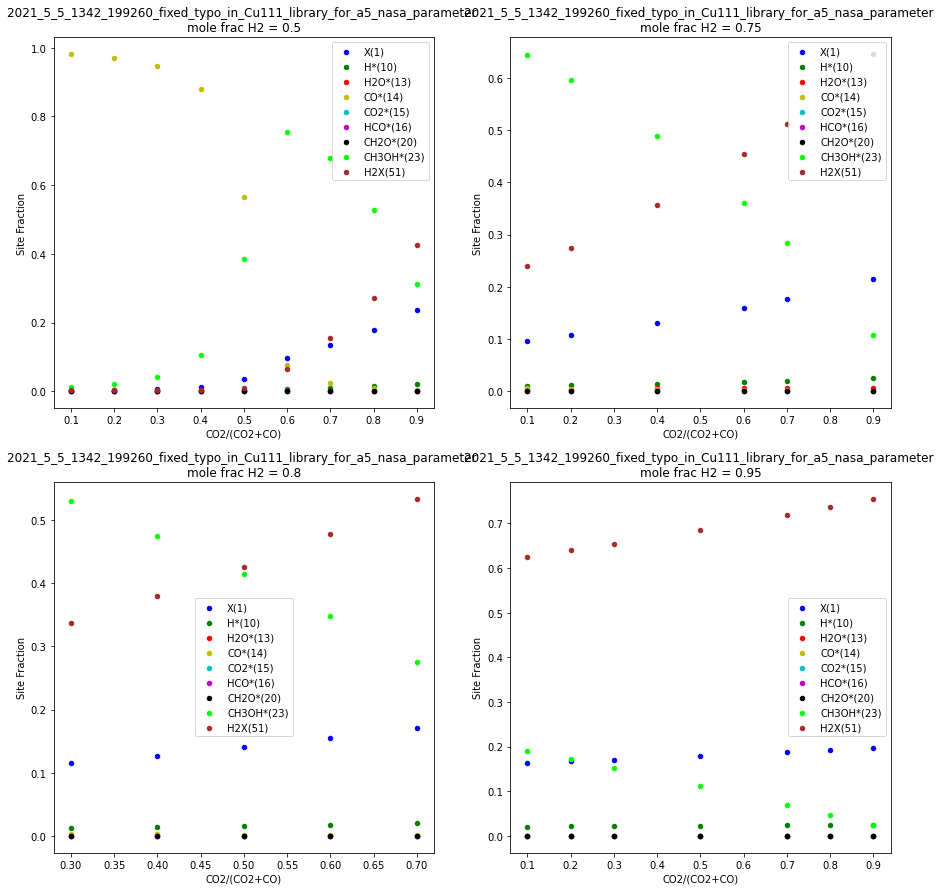

In [23]:
# compare the rate of production for CO2,  H2O, CO, and CH3OH
# for commit in commit_list:
commit = commit_list[0] 

conditions = imp_species
temp = 400

# get keys for H2 (X_h2 initial)
H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()
H2_ratio = set([round(i,2) for i in H2_ratio])

fig, ax = plt.subplots(2,2,figsize=(15,15))

color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4:"c", 5:"m", 6: "k", 7: "lime" , 8:"brown"}
for p,j in enumerate(H2_ratio):
    if p == 0:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
            ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[0,0].set_ylabel("Site Fraction")
    if p == 1:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
            ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[0,1].set_ylabel("Site Fraction")
    if p == 2:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c],)
            ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[1,0].set_ylabel("Site Fraction")
    if p == 3:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
            ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[1,1].set_ylabel("Site Fraction")

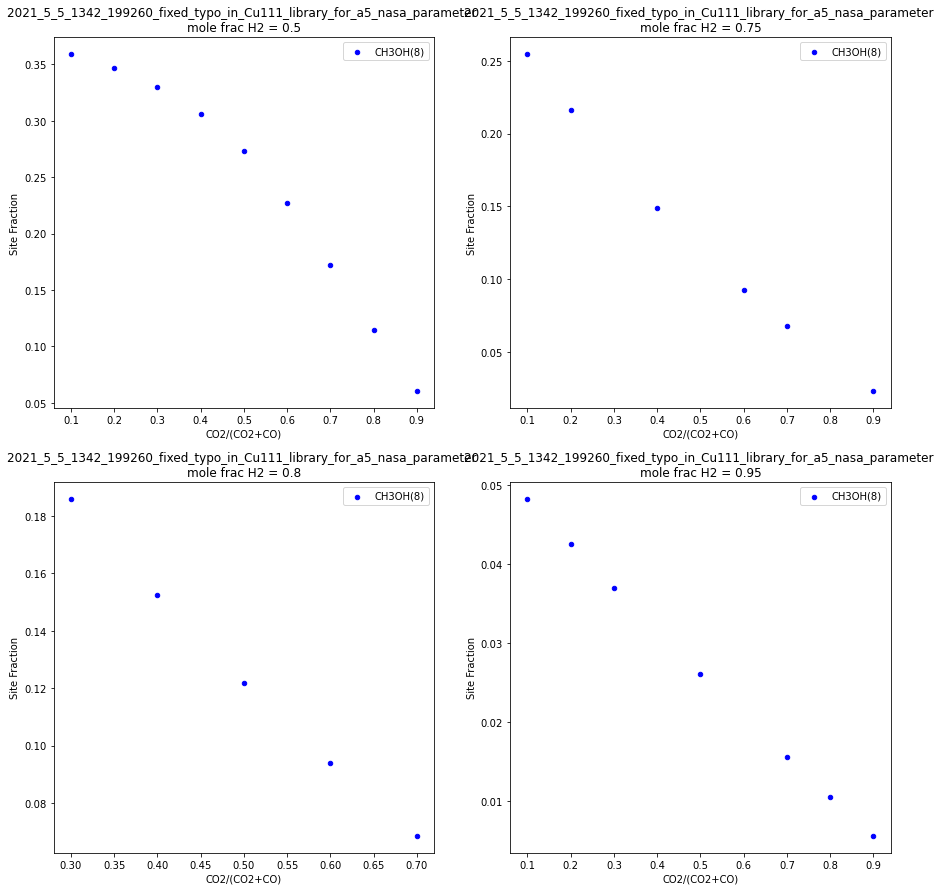

In [25]:
for commit in commit_list:
# commit = 'a95dd5_added_new_family_sur'  

    conditions = ["CH3OH(8)"]

    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()
    H2_ratio = set([round(i,2) for i in H2_ratio])
    
    fig, ax = plt.subplots(2,2,figsize=(15,15))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4:"c", 5:"m"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[0,0].set_ylabel("mole fraction")
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[0,1].set_ylabel("Site Fraction")
        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c],)
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[1,0].set_ylabel("Site Fraction")
        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[1,1].set_ylabel("Site Fraction")

## Surface coverage comparison


In [ ]:
Image('../images/Grabow_plots/Grabow_coverage.png',width = 700, height = 300)

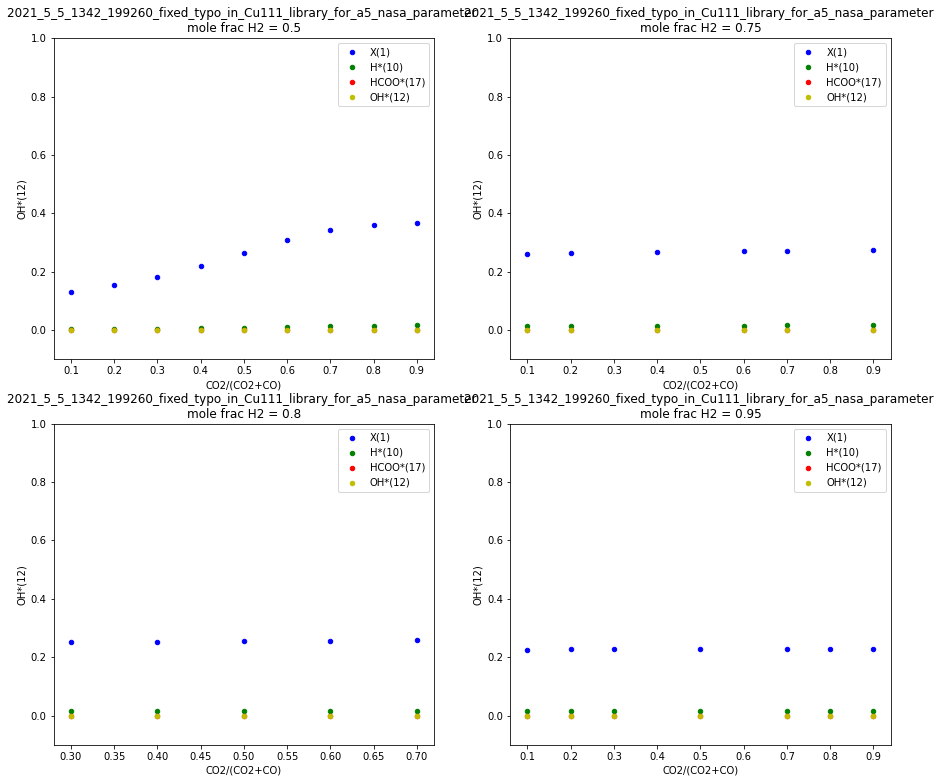

In [26]:
for commit in commit_list:  

    # removing HCOO because we ar using the wrong species
    #     conditions = ['X(1)', 'H*(10)', 'CH3O*(20)', 'HCOO*(17)', 'OH*(12)']
    conditions = ['X(1)', 'H*(10)', 'HCOO*(17)', 'OH*(12)']
    
    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()
    H2_ratio = set([round(i,2) for i in H2_ratio])
    
    fig, ax = plt.subplots(2,2,figsize=(15,13))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4: "k"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c], ylim=[-0.1,1.0])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c], ylim=[-0.1,1.0])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c],ylim=[-0.1,1.0])
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c], ylim=[-0.1,1.0])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')

## flux diagrams

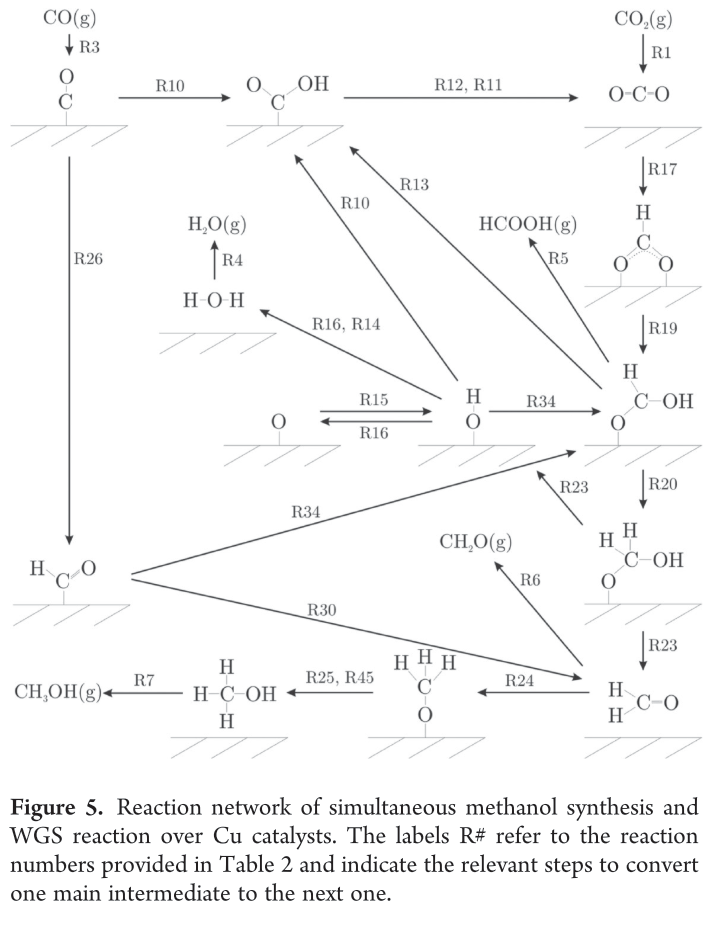

In [27]:
Image('../images/Grabow_plots/Grabow_rxn_path.png',width = 500, height = 300)

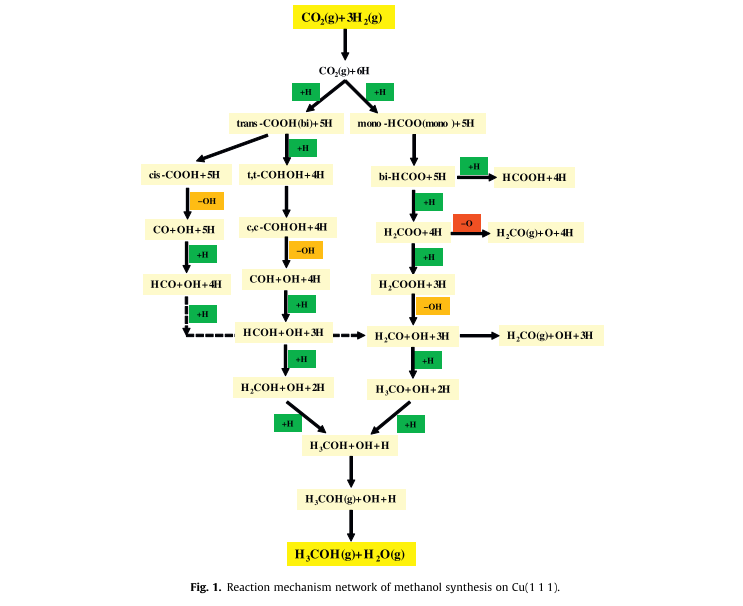

In [28]:
Image('../images/Reaction_mechanism_alternative.png',width = 700, height = 300)

description of commits: 


FileNotFoundError: [Errno 2] No such file or directory: '../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasConstPressureReactor/600/flux_diagrams/0_5/0_9/reaction_path_C_surface1_end-pretty.dot.png'

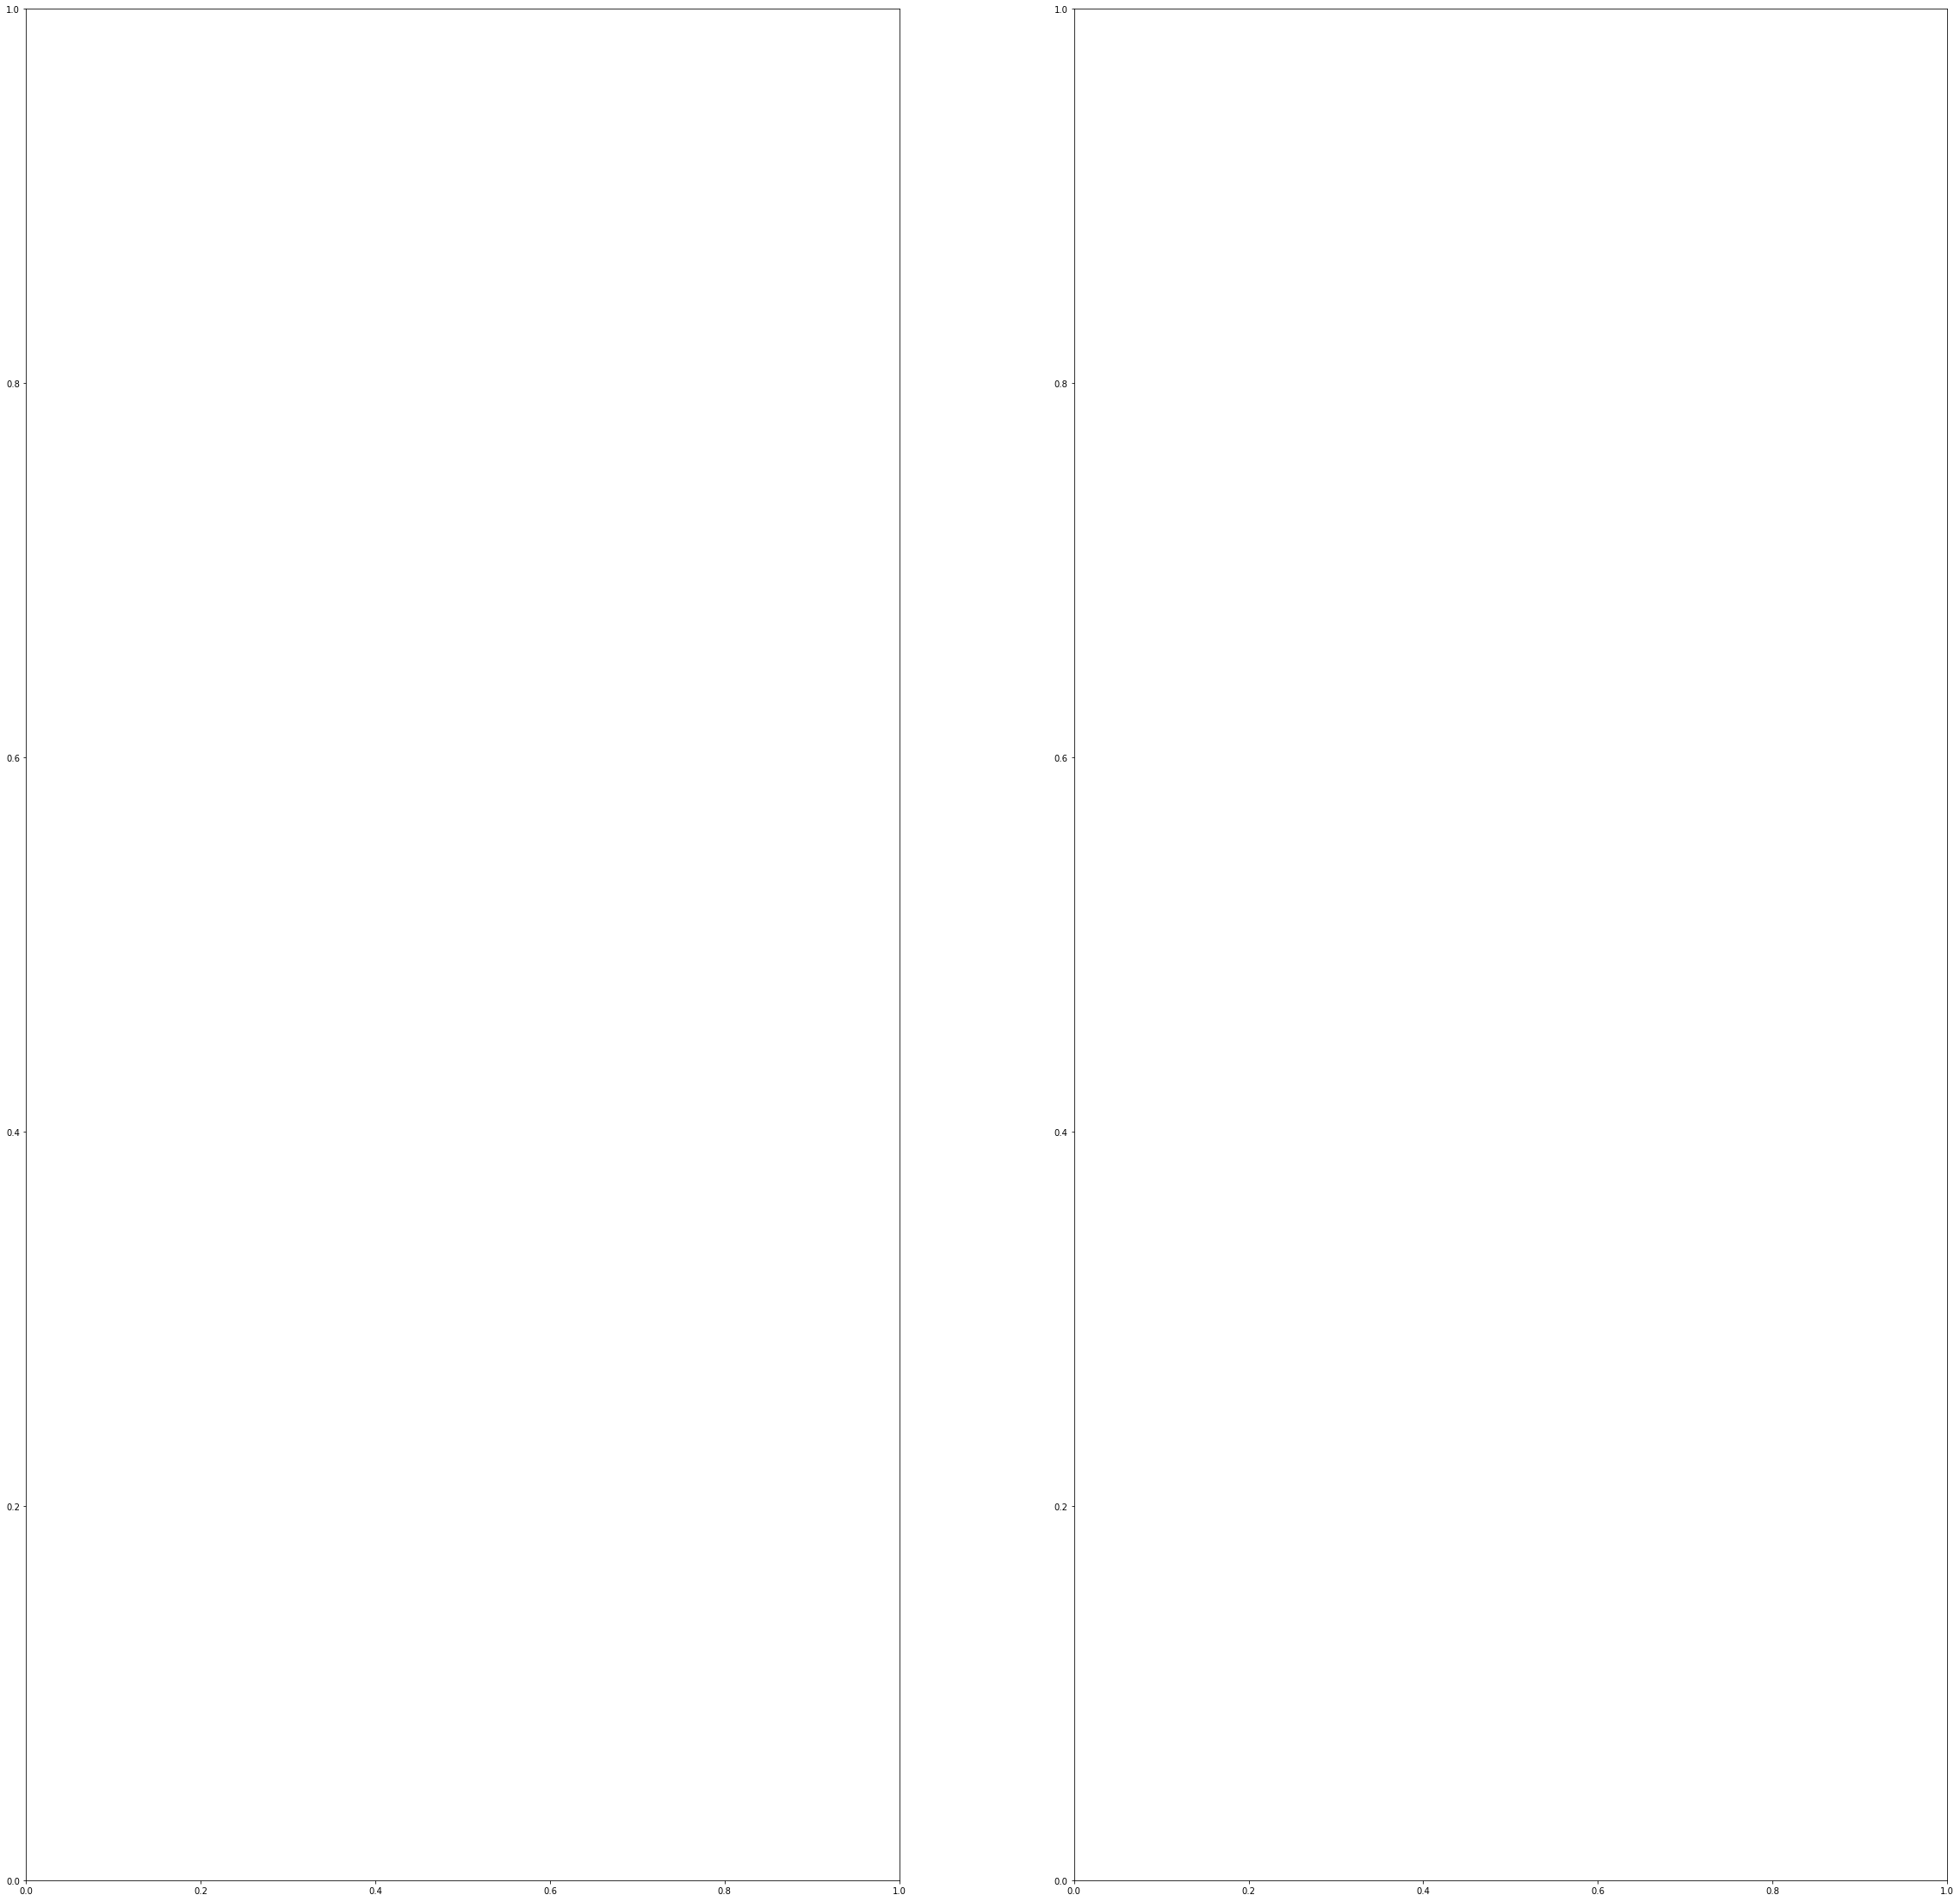

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import math

%matplotlib inline
img = []
flux_path = []

# determine # of rows and columns for displays
placeholder = [1,2,3,4,5]



if one_commit == False:
    rcParams['figure.figsize'] = 40 ,40
    if len(commit_list)%2 == 0:
        rows = int(len(commit_list)/2)
    else: 
        rows = int(math.ceil(len(commit_list)/2))

    fig, ax = plt.subplots(rows,2)
    for i,commit in enumerate(commit_list):
        temp = 600 
        H2_frac = "0_5"
        CO_CO2 = "0_9"
        element = "C"
        phase = "surface1" # "surface1" "gas"
        time = "end" # "end" "beginning"
        prefix = '../RMG_wDeut/'
        flux_path.append(f'/IdealGasConstPressureReactor/{temp}/flux_diagrams/{H2_frac}/{CO_CO2}/reaction_path_{element}_{phase}_{time}-pretty.dot.png')


        img.append(mpimg.imread(f'{prefix}{commit}{flux_path[i]}'))

        #determine placement of picture
        if i%2 == 0:
            row = int(i/2)-1
            col = 0
        else:
            row = int(math.ceil(i/2)) - 1
            col = 1

        ax[row,col].imshow(img[i])
        ax[row,col].get_xaxis().set_visible(False) 
        ax[row,col].get_yaxis().set_visible(False) 
        ax[row,col].set_title(f'{commit}', fontsize = 30)
        
else:
    rcParams['figure.figsize'] = 10 ,10
    fig, ax = plt.subplots(1,1)
    for i,commit in enumerate(commit_list):
        temp = 500 
        H2_frac = "0_5"
        CO_CO2 = "0_9"
        element = "C"
        phase = "surface1" # "surface1" "gas"
        time = "end" # "end" "beginning"
        prefix = '../RMG_wDeut/'
        flux_path.append(f'/IdealGasReactor/transient/{temp}/flux_diagrams/{H2_frac}/{CO_CO2}/reaction_path_{element}_{phase}_{time}-pretty.dot.png')


        img.append(mpimg.imread(f'{prefix}{commit}{flux_path[i]}'))

        ax.imshow(img[i])
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 
        ax.set_title(f'{commit}', fontsize = 30)



### pathway analysis

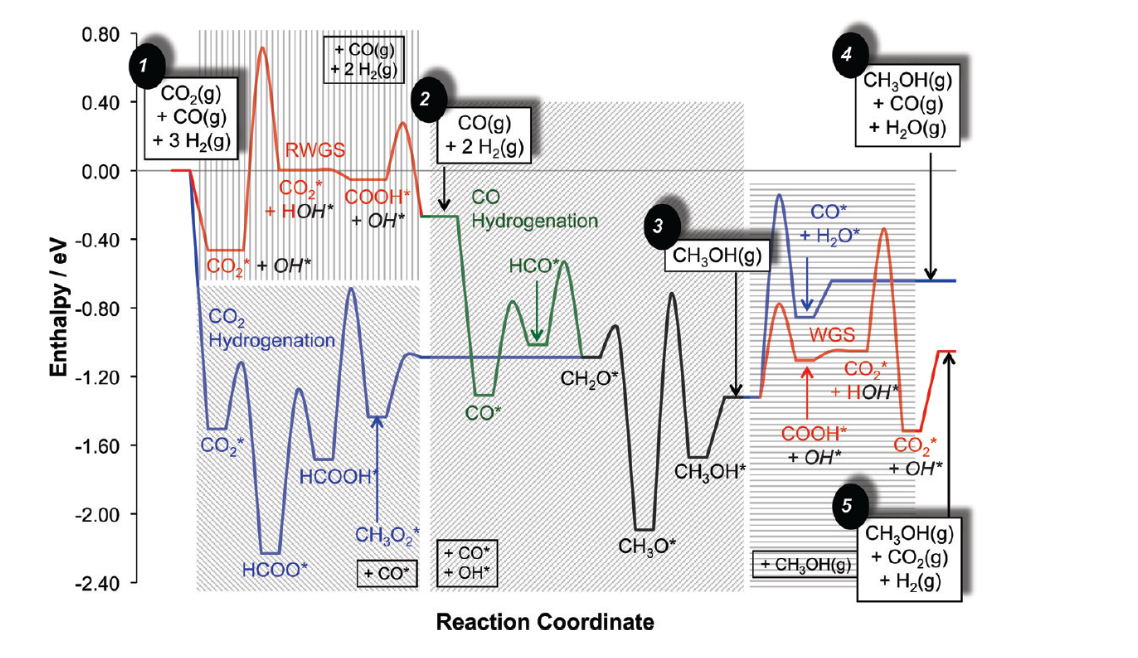

In [31]:
Image('../images/Grabow_plots/Grabow_PES.png',width = 1000, height = 300)

# Sensitivity

In [33]:
# load data into big data dictionary
sens_data_dict = {}
temps = [] 
X_h2s = []
X_coco2s = []

# excluded directories
exclude = ["/csp/", "/steady_state/", "sensitivity_off"]

for path in Path('../RMG_wDeut/' + commit).rglob('*.csv'):
    path_str = str(path)
    if os.stat(path_str).st_size != 0 and all(f not in path_str for f in exclude):
        data = pd.read_csv(path_str)
        
        #if we have more than 1 line of data, pull sensitivity
        if len(data['T (C)']) >= 1: 
            temp = round(float(data['T (C)'].unique()), 2)
            X_h2 = round(float(data['X_h2 initial'].unique()),2)
            X_coco2 = round(float(data['CO2/(CO2+CO)'].unique()),2)

            if temp not in temps: temps.append(temp)
            if X_h2 not in X_h2s: X_h2s.append(X_h2) 
            if X_coco2 not in X_coco2s: X_coco2s.append(X_coco2)

            sens_data_dict.update({(temp,X_h2,X_coco2) : data})
            print("!!!!!!!!!sim_passed", path_str)
        else:
            print(path_str)
            print("empty data, sim crashed")

../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_1.csv
empty data, sim crashed
../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_2.csv
empty data, sim crashed
../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_3.csv
empty data, sim crashed
../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/400/results/Spinning_basket_area_43.2_energy_off_temp_400_h2_0_5_COCO2_0_4.csv
empty data, sim crashed
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_fo

!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_5_COCO2_0_2.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_5_COCO2_0_3.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_5_COCO2_0_4.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/500/results/Spinning_basket_area_43.2_energy_off_temp_500_h2_0_5_COCO2_0_5.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parame

!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_5_COCO2_0_3.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_5_COCO2_0_4.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_5_COCO2_0_5.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_on/600/results/Spinning_basket_area_43.2_energy_off_temp_600_h2_0_5_COCO2_0_6.csv
!!!!!!!!!sim_passed ../RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parame

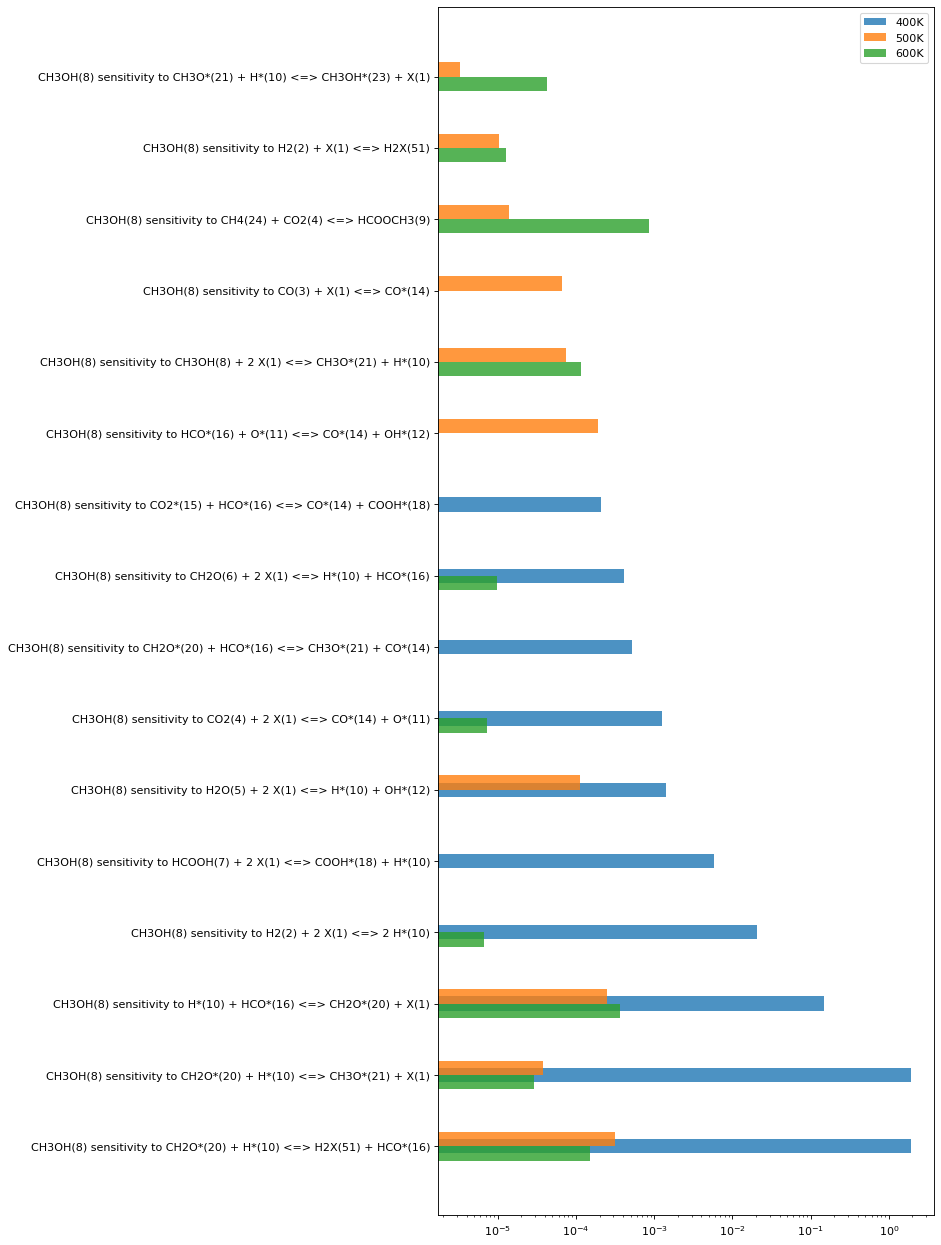

In [34]:
from matplotlib.pyplot import figure

figure(figsize=(8, 20), dpi=80)

def max_sensitivities(df, number=0):
    # make a dictionary of highest sensitivity (tuple?)
    columns = {}
    for key, value in df.iteritems():
        if "sensitivity" in key:
            max_sens = value.max()
            min_sens = value.min()
            
            if abs(max_sens) >= abs(min_sens):
                extreme_sens = max_sens
            elif abs(max_sens) < abs(min_sens):
                extreme_sens = min_sens
                
                
            columns.update({key:extreme_sens})
#             print(key, max_sens)

    if number !=0:
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True)[:number])
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False)[:number])
    else: 
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True))
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False))
    return columns, columns_rev


# plot the top sensitivities for a dataframe
def plot_sensitivities(df, num = 5, align="center", height=0.2, label = ""):
    
    imp_reactions_pos, imp_reactions_neg = max_sensitivities(df,num)
    imp_reactions = {**imp_reactions_pos, **imp_reactions_neg}

    plt.barh(*zip(*imp_reactions.items()),height=height, log=True, align=align,alpha=0.8, label=label)
#     plt.show()

    plt.legend(loc='best')
#     imp_reactions_df.plot(kind='barh')

columns, columns_rev = max_sensitivities(sens_data_dict[400.0, 0.5, 0.5],5)

plot_sensitivities(sens_data_dict[400.0, 0.5, 0.5],10, "center", label="400K")
plot_sensitivities(sens_data_dict[500.0, 0.5, 0.5],10, "edge",label="500K")
plot_sensitivities(sens_data_dict[600.0, 0.5, 0.5],10, "edge", height=-0.2, label="600K")

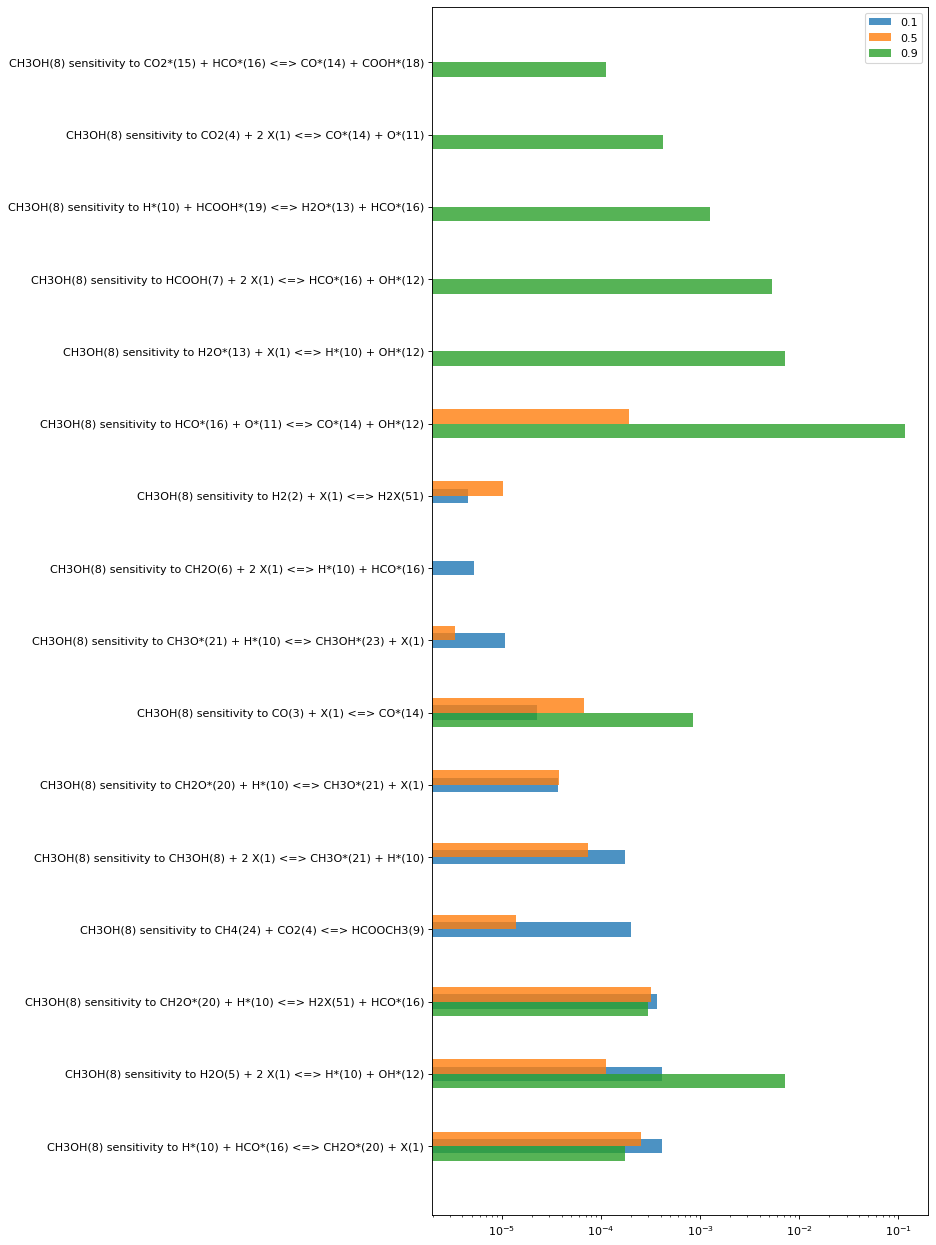

In [35]:
figure(figsize=(8, 20), dpi=80)

plot_sensitivities(sens_data_dict[500.0, 0.5, 0.1],10, "center", label="0.1")
plot_sensitivities(sens_data_dict[500.0, 0.5, 0.5],10, "edge",label="0.5")
plot_sensitivities(sens_data_dict[500.0, 0.5, 0.9],10, "edge", height=-0.2, label="0.9")

In [ ]:
imp_reactions_pos, imp_reactions_neg = max_sensitivities(df,num)
imp_reactions = {**imp_reactions_pos, **imp_reactions_neg}

imp_reactions_df = pd.Series(data = imp_reactions)
imp_reactions_df.to_csv(f'sensitivities_test.csv')

In [ ]:
def max_sensitivities(df, number=0):
    # make a dictionary of highest sensitivity (tuple?)
    columns = {}
    for key, value in df.iteritems():
        if "thermo sensitivity" in key:
            max_sens = value.max()
            min_sens = value.min()
            
            if abs(max_sens) >= abs(min_sens):
                extreme_sens = max_sens
            elif abs(max_sens) < abs(min_sens):
                extreme_sens = min_sens
                
                
            columns.update({key:extreme_sens})

    if number !=0:
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True)[:number])
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False)[:number])
    else: 
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True))
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False))
    return columns, columns_rev


# plot the top sensitivities for a dataframe
def plot_sensitivities(df, num = 5):
    
    imp_reactions_pos, imp_reactions_neg  = max_sensitivities(df,num)
    imp_reactions = {**imp_reactions_pos, **imp_reactions_neg}
    
    plt.barh(*zip(*imp_reactions.items()))



columns, columns_rev = max_sensitivities(sens_data_dict[400.0, 0.5, 0.9],5)

plot_sensitivities(sens_data_dict[400.0, 0.5, 0.9],10)